<a href="https://colab.research.google.com/github/Julian27R/Aprendizaje_Maquina/blob/main/1_Ejercicio_IntroProbabilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**REPASO DE PORBABILIDAD**
##**Ejercicio Teorema de Bayes**

##*Ejercicio: Teorema de Bayes para dos cajas y dos frutas, resuleto a mano*

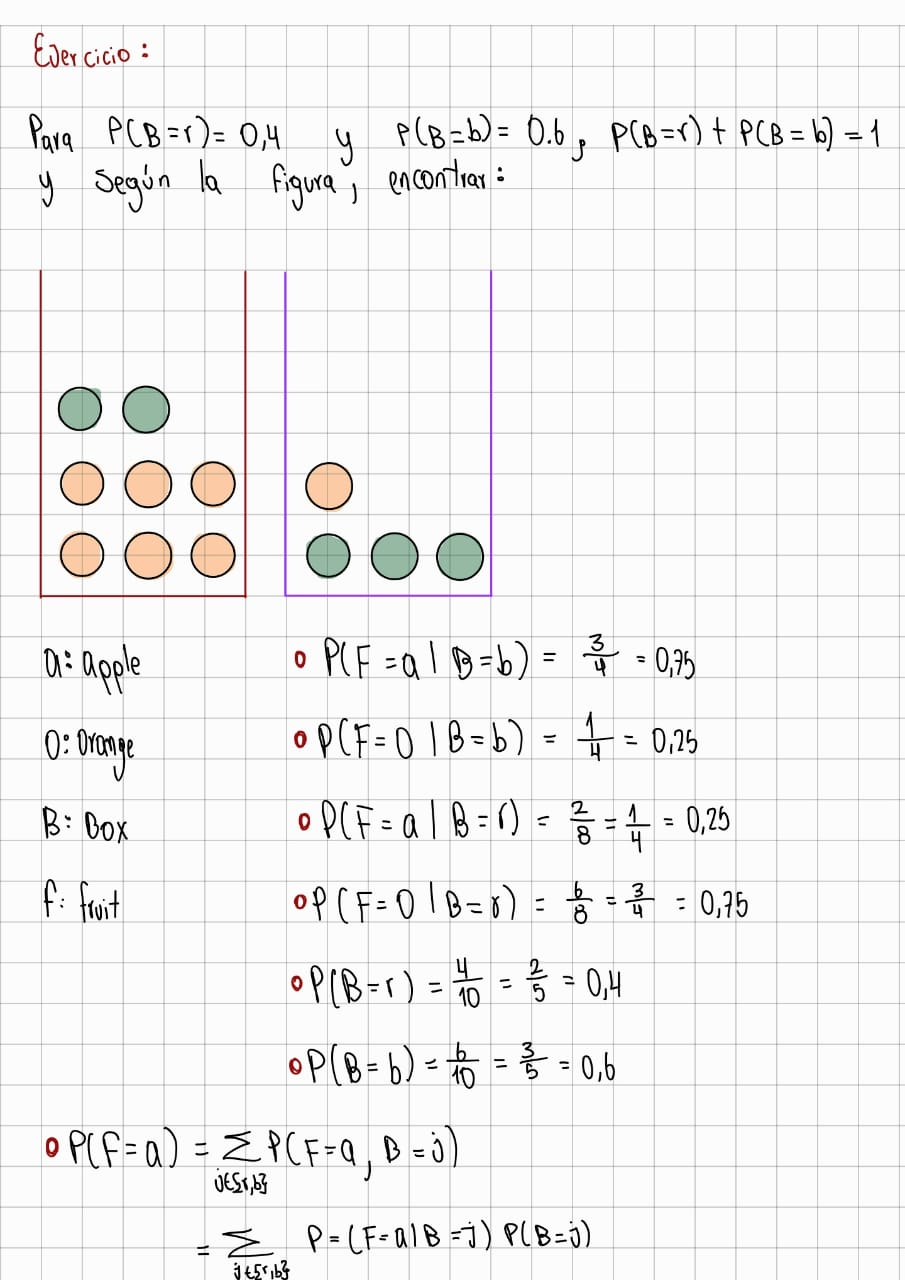


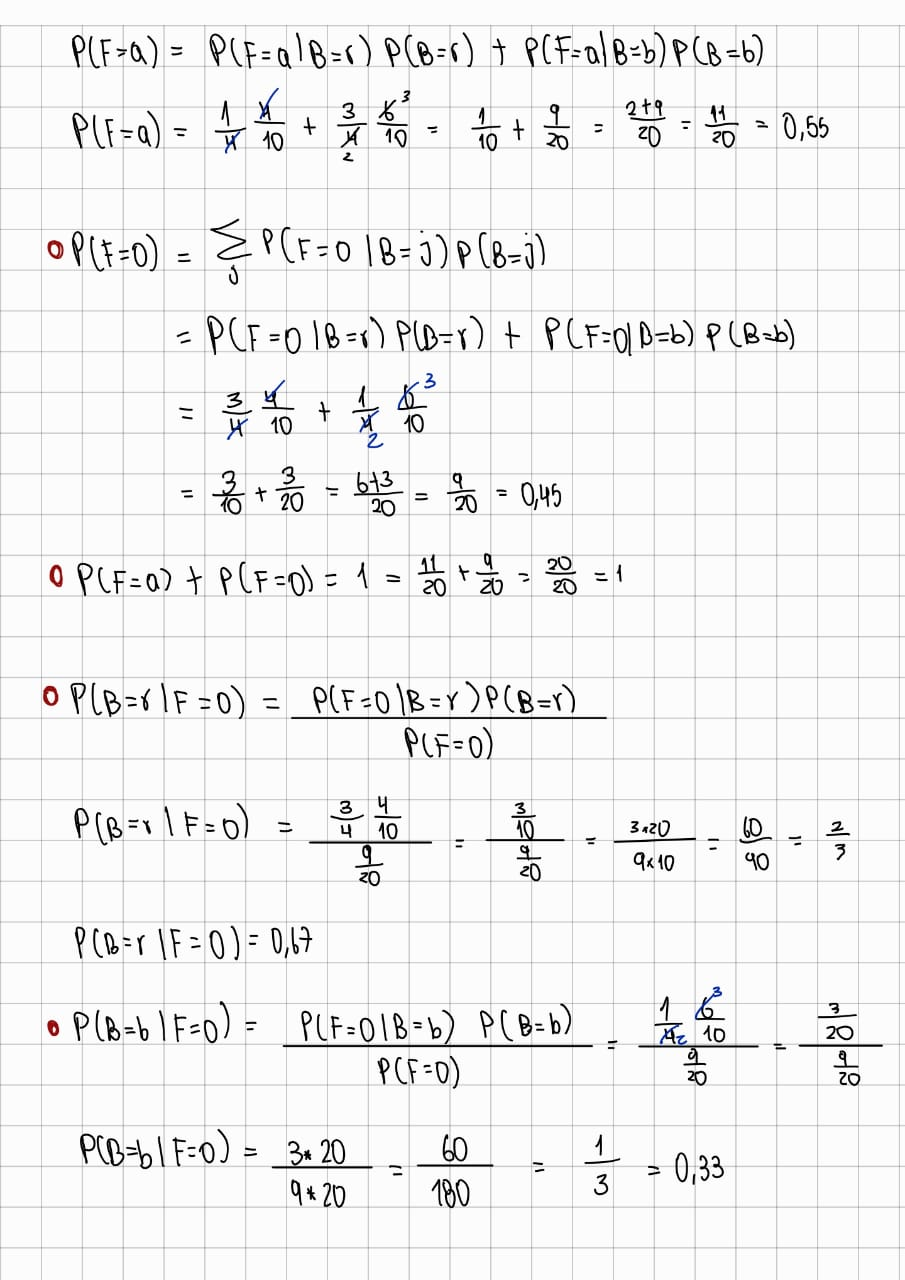

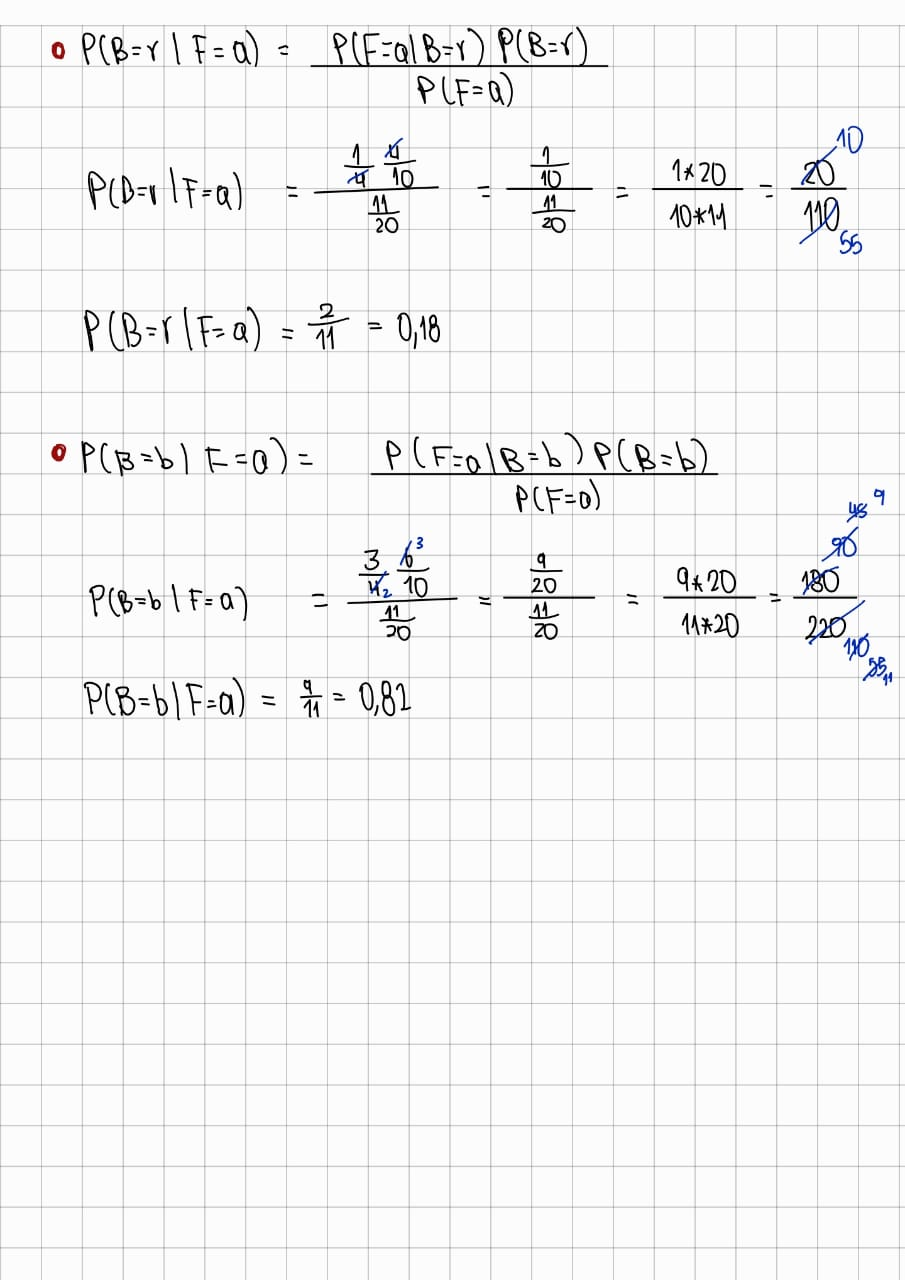

#Hecho con Deepseek

##Prompt

Hola deepseek estoy estudiando el Teorema de Bayes, necesito que me ayudes a realizar un codigo en Python que calcule el Posterior, la Verosimilitud y la Evidencia; teniendo en cuenta que se esta solucionando el problema para dos cajas de color rojo y azul que tienen un Prior de 0.4 y 0.6 respectivamente, la caja de color rojo esta compuesta por 2 manzanas, 6 naranjas y la caja de color azul esta compuesta por una naraja y 3 manzanas.

In [ ]:
# Definición de las cajas con sus priors y conteo de frutas
cajas = [
    {
        'nombre': 'rojo',
        'prior': 0.4,
        'manzanas': 2,
        'naranjas': 6
    },
    {
        'nombre': 'azul',
        'prior': 0.6,
        'manzanas': 3,
        'naranjas': 1
    }
]

# Cálculo de las verosimilitudes (likelihoods)
for caja in cajas:
    total = caja['manzanas'] + caja['naranjas']
    caja['verosimilitud_manzana'] = caja['manzanas'] / total
    caja['verosimilitud_naranja'] = caja['naranjas'] / total

# Cálculo de la evidencia
evidencia_manzana = sum(caja['verosimilitud_manzana'] * caja['prior'] for caja in cajas)
evidencia_naranja = sum(caja['verosimilitud_naranja'] * caja['prior'] for caja in cajas)

# Cálculo de los posteriores
posterior_rojo_manzana = (cajas[0]['verosimilitud_manzana'] * cajas[0]['prior']) / evidencia_manzana
posterior_azul_manzana = (cajas[1]['verosimilitud_manzana'] * cajas[1]['prior']) / evidencia_manzana
posterior_rojo_naranja = (cajas[0]['verosimilitud_naranja'] * cajas[0]['prior']) / evidencia_naranja
posterior_azul_naranja = (cajas[1]['verosimilitud_naranja'] * cajas[1]['prior']) / evidencia_naranja

# Resultados
print("Verosimilitudes (Likelihoods):")
print(f"P(Manzana|Rojo) = {cajas[0]['verosimilitud_manzana']:.2f}")
print(f"P(Naranja|Rojo) = {cajas[0]['verosimilitud_naranja']:.2f}")
print(f"P(Manzana|Azul) = {cajas[1]['verosimilitud_manzana']:.2f}")
print(f"P(Naranja|Azul) = {cajas[1]['verosimilitud_naranja']:.2f}\n")

print("Evidencias (Marginal Likelihoods):")
print(f"P(Manzana) = {evidencia_manzana:.2f}")
print(f"P(Naranja) = {evidencia_naranja:.2f}\n")

print("Probabilidades Posteriores:")
print(f"P(Rojo|Manzana) = {posterior_rojo_manzana:.2f}")
print(f"P(Azul|Manzana) = {posterior_azul_manzana:.2f}")
print(f"P(Rojo|Naranja) = {posterior_rojo_naranja:.2f}")
print(f"P(Azul|Naranja) = {posterior_azul_naranja:.2f}")

Verosimilitudes (Likelihoods):
P(Manzana|Rojo) = 0.25
P(Naranja|Rojo) = 0.75
P(Manzana|Azul) = 0.75
P(Naranja|Azul) = 0.25

Evidencias (Marginal Likelihoods):
P(Manzana) = 0.55
P(Naranja) = 0.45

Probabilidades Posteriores:
P(Rojo|Manzana) = 0.18
P(Azul|Manzana) = 0.82
P(Rojo|Naranja) = 0.67
P(Azul|Naranja) = 0.33


##Prompt para seguir con n cajas y n frutas:

Muy bien, ahora guiándonos del mismo ejercicio acabado de resolver, necesito ampliar el código para que le permita al usuario ingresar el numero de eventos que desee (numero de cajas), de la misma manera que el numero y la cantidad de frutas que van en cada caja.



In [3]:
def main():
    # Solicitar número de cajas
    n_cajas = int(input("Número de cajas: "))
    cajas = []
    frutas_tipos = set()

    # Recoger datos de cada caja
    for i in range(n_cajas):
        print(f"\nCaja {i+1}:")
        nombre = input("Nombre de la caja: ")
        prior = float(input("Prior (probabilidad a priori): "))

        # Validar prior positivo
        while prior < 0:
            print("El prior no puede ser negativo")
            prior = float(input("Prior (probabilidad a priori): "))

        # Recoger frutas
        n_frutas_tipos = int(input("Número de tipos de fruta en la caja: "))
        frutas = {}

        for j in range(n_frutas_tipos):
            nombre_fruta = input(f"Nombre de la fruta {j+1}: ").strip().lower()
            cantidad = int(input(f"Cantidad de {nombre_fruta}: "))

            # Validar cantidad positiva
            while cantidad < 0:
                print("La cantidad no puede ser negativa")
                cantidad = int(input(f"Cantidad de {nombre_fruta}: "))

            frutas[nombre_fruta] = cantidad
            frutas_tipos.add(nombre_fruta)

        # Calcular total de frutas y guardar
        total = sum(frutas.values())
        if total == 0:
            print("¡Error! La caja debe contener al menos una fruta")
            return

        cajas.append({
            'nombre': nombre,
            'prior': prior,
            'frutas': frutas,
            'total_frutas': total
        })

    # Validar suma de priors
    total_priors = sum(caja['prior'] for caja in cajas)
    if not (0.999 <= total_priors <= 1.001):
        print(f"\n¡Advertencia! La suma de priors es {total_priors:.2f} (debe ser 1.0)")

    # Calcular verosimilitudes
    frutas_tipos = sorted(frutas_tipos)
    for caja in cajas:
        caja['likelihood'] = {
            fruta: caja['frutas'].get(fruta, 0) / caja['total_frutas']
            for fruta in frutas_tipos
        }

    # Calcular evidencias
    evidencias = {}
    for fruta in frutas_tipos:
        evidencias[fruta] = sum(caja['prior'] * caja['likelihood'][fruta] for caja in cajas)

    # Calcular posteriores
    posteriores = {}
    for fruta in frutas_tipos:
        posteriores[fruta] = []
        for caja in cajas:
            if evidencias[fruta] == 0:
                posterior = 0.0
            else:
                posterior = (caja['prior'] * caja['likelihood'][fruta]) / evidencias[fruta]
            posteriores[fruta].append((caja['nombre'], posterior))

    # Mostrar resultados
    print("\n\nRESULTADOS:")
    print("\nVerosimilitudes (Likelihoods):")
    for caja in cajas:
        print(f"\nCaja {caja['nombre']}:")
        for fruta in frutas_tipos:
            print(f"P({fruta.capitalize()}|{caja['nombre']}) = {caja['likelihood'][fruta]:.2f}")

    print("\nEvidencias (Probabilidades marginales):")
    for fruta in frutas_tipos:
        print(f"P({fruta.capitalize()}) = {evidencias[fruta]:.2f}")

    print("\nProbabilidades Posteriores:")
    for fruta in frutas_tipos:
        print(f"\nDado {fruta.capitalize()}:")
        for nombre, posterior in posteriores[fruta]:
            print(f"P({nombre}|{fruta.capitalize()}) = {posterior:.2f}")

if __name__ == "__main__":
    main()

Número de cajas: 3

Caja 1:
Nombre de la caja: amarilla
Prior (probabilidad a priori): 0.4
Número de tipos de fruta en la caja: 3
Nombre de la fruta 1: manzana
Cantidad de manzana: 4
Nombre de la fruta 2: pera
Cantidad de pera: 5
Nombre de la fruta 3: mango
Cantidad de mango: 9

Caja 2:
Nombre de la caja: roja
Prior (probabilidad a priori): 0.3
Número de tipos de fruta en la caja: 3
Nombre de la fruta 1: manzana
Cantidad de manzana: 8
Nombre de la fruta 2: pera
Cantidad de pera: 3
Nombre de la fruta 3: mango
Cantidad de mango: 2

Caja 3:
Nombre de la caja: azul
Prior (probabilidad a priori): 0.3
Número de tipos de fruta en la caja: 3
Nombre de la fruta 1: manzana
Cantidad de manzana: 2
Nombre de la fruta 2: pera
Cantidad de pera: 9
Nombre de la fruta 3: mango
Cantidad de mango: 2


RESULTADOS:

Verosimilitudes (Likelihoods):

Caja amarilla:
P(Mango|amarilla) = 0.50
P(Manzana|amarilla) = 0.22
P(Pera|amarilla) = 0.28

Caja roja:
P(Mango|roja) = 0.15
P(Manzana|roja) = 0.62
P(Pera|roja) = 